# Assignment #03

This assignment is composed of 2 tasks that your teams is supposed complete.

1. Create a function to remove "blank slices" from a 3D dataset, which in this case consist of a 3D brain magnetic resonance image. "Blank slices" are slices that do not have signal in them. The "blank slices" should be removed across all three dimensions of the 3D volume.
2. Implement our use an existing data augmentation and generation utility for image segmentation applications


The deliverable of this assignment is this jupyter-notebook completed with your solution. 
    - Create a folder assignment-03. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The repository is the same repository that your team created for assignment 1 and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

## Remove Blank Slices

For this function, remember that a blank slice is different from a slice that does not have the structire you want to segment.

In [39]:
import matplotlib.pylab as plt
import nibabel as nib
import numpy as np


def remove_blank_slices(img, mask):
    """
    Function to remove blank slices
    """
    normalized_img = (img - np.mean(img)) / np.std(img)
    theta = 0.1
    indices = np.where(normalized_img > theta)
    img_cropped = img[np.min(indices[0]):np.max(indices[0]) + 1, np.min(indices[1]):np.max(indices[1]) + 1,
                  np.min(indices[2]):np.max(indices[2]) + 1]
    mask_cropped = mask[np.min(indices[0]):np.max(indices[0]) + 1, np.min(indices[1]):np.max(indices[1]) + 1,
                   np.min(indices[2]):np.max(indices[2]) + 1]
    return img_cropped, mask_cropped

Image and mask shapes before cropping
(171, 256, 256) (171, 256, 256)


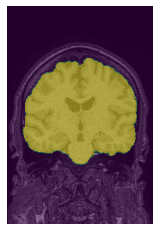

Image and mask shapes after cropping
(171, 230, 214) (171, 230, 214)


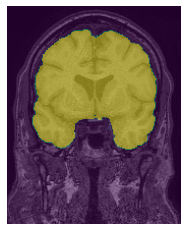

In [40]:
data = nib.load("CC0001_philips_15_55_M.nii.gz").get_fdata()
mask = nib.load("CC0001_philips_15_55_M_staple.nii.gz").get_fdata()

print("Image and mask shapes before cropping")
print(data.shape, mask.shape)

plt.figure()
plt.imshow(np.rot90(data[:, 119]), cmap="gray")
plt.imshow(np.rot90(mask[:, 119]), alpha=0.5)
plt.axis("off")
plt.show()

data_cropped, mask_cropped = remove_blank_slices(data, mask)

print("Image and mask shapes after cropping")
print(data_cropped.shape, mask_cropped.shape)

plt.figure()
plt.imshow(np.rot90(data_cropped[:, 119]), cmap="gray")
plt.imshow(np.rot90(mask_cropped[:, 119]), alpha=0.5)
plt.axis("off")
plt.show()

## Data Augmentation and Generation

You can use available utils to propose a solution for this portio nof the assignment.

- [Imgaug](https://imgaug.readthedocs.io/en/latest/)
- [Albumentations](https://albumentations.ai/)
    - Keras. There is a nice tutorial [here](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly). You can also extend the Data Generation utils we created in class to include data augmentation operations ([here](data_generator.py))

Remmeber, the essential steps are:
1. Load a batch of images (randomly and from random volumes)
2. Apply a predetrmined set of random data augmentation transformations
3. Crop the images and mask to a specific patch size and return a batch of samples.

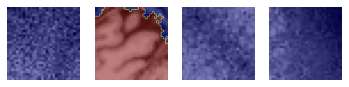

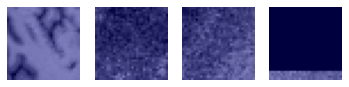

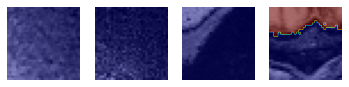

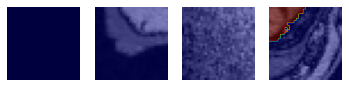

In [74]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from os import listdir
from torch.utils.data import DataLoader
from data_generator import BrainMRI2D

patch_size = (32, 32)

transform = A.Compose(
    [
        A.ShiftScaleRotate(),  #Randomly apply affine transforms: translate, scale and rotate the input.
        A.RandomCrop(height=patch_size[0], width=patch_size[1]),  #Randomly crop the input to desired patch size
        ToTensorV2(),  #Convert image and mask to torch.Tensor
    ]
)

image_dir = 'samples/images'
mask_dir = 'samples/masks'
image_files = listdir(image_dir)
dataset = BrainMRI2D(image_dir, mask_dir, file_ids=image_files, transform=transform)
dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=True)  #Combines a dataset and a sampler, and provides an iterable over the given dataset.


#Plotting the results
for i, batch in enumerate(dataloader):
    images, masks = batch['image'], batch['mask']
    n = 0
    for img, mask in zip(images, masks):
        plt.subplot(1, 4, n + 1)
        plt.imshow(np.rot90(img.squeeze(0)), cmap='Greys_r')
        plt.imshow(np.rot90(mask) > 0.5, cmap='jet', alpha=0.5)
        plt.axis("off")
        n += 1
    plt.show()

